In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
train = pd.read_csv('/content/drive/MyDrive/Training.csv')
test = pd.read_csv('/content/drive/MyDrive/Testing.csv')

In [50]:
train.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [51]:
# we drop the unnamed column
train = train.drop("Unnamed: 133",axis=1)

In [52]:
# we check how many unique diseases we have
len(train['prognosis'].unique())

41

In [53]:
# Checking for missing data : 
len(train) - train.isna().count() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [54]:
from pandas.plotting import scatter_matrix

Text(0.5, 1.0, 'Multi-Collinearity of Features')

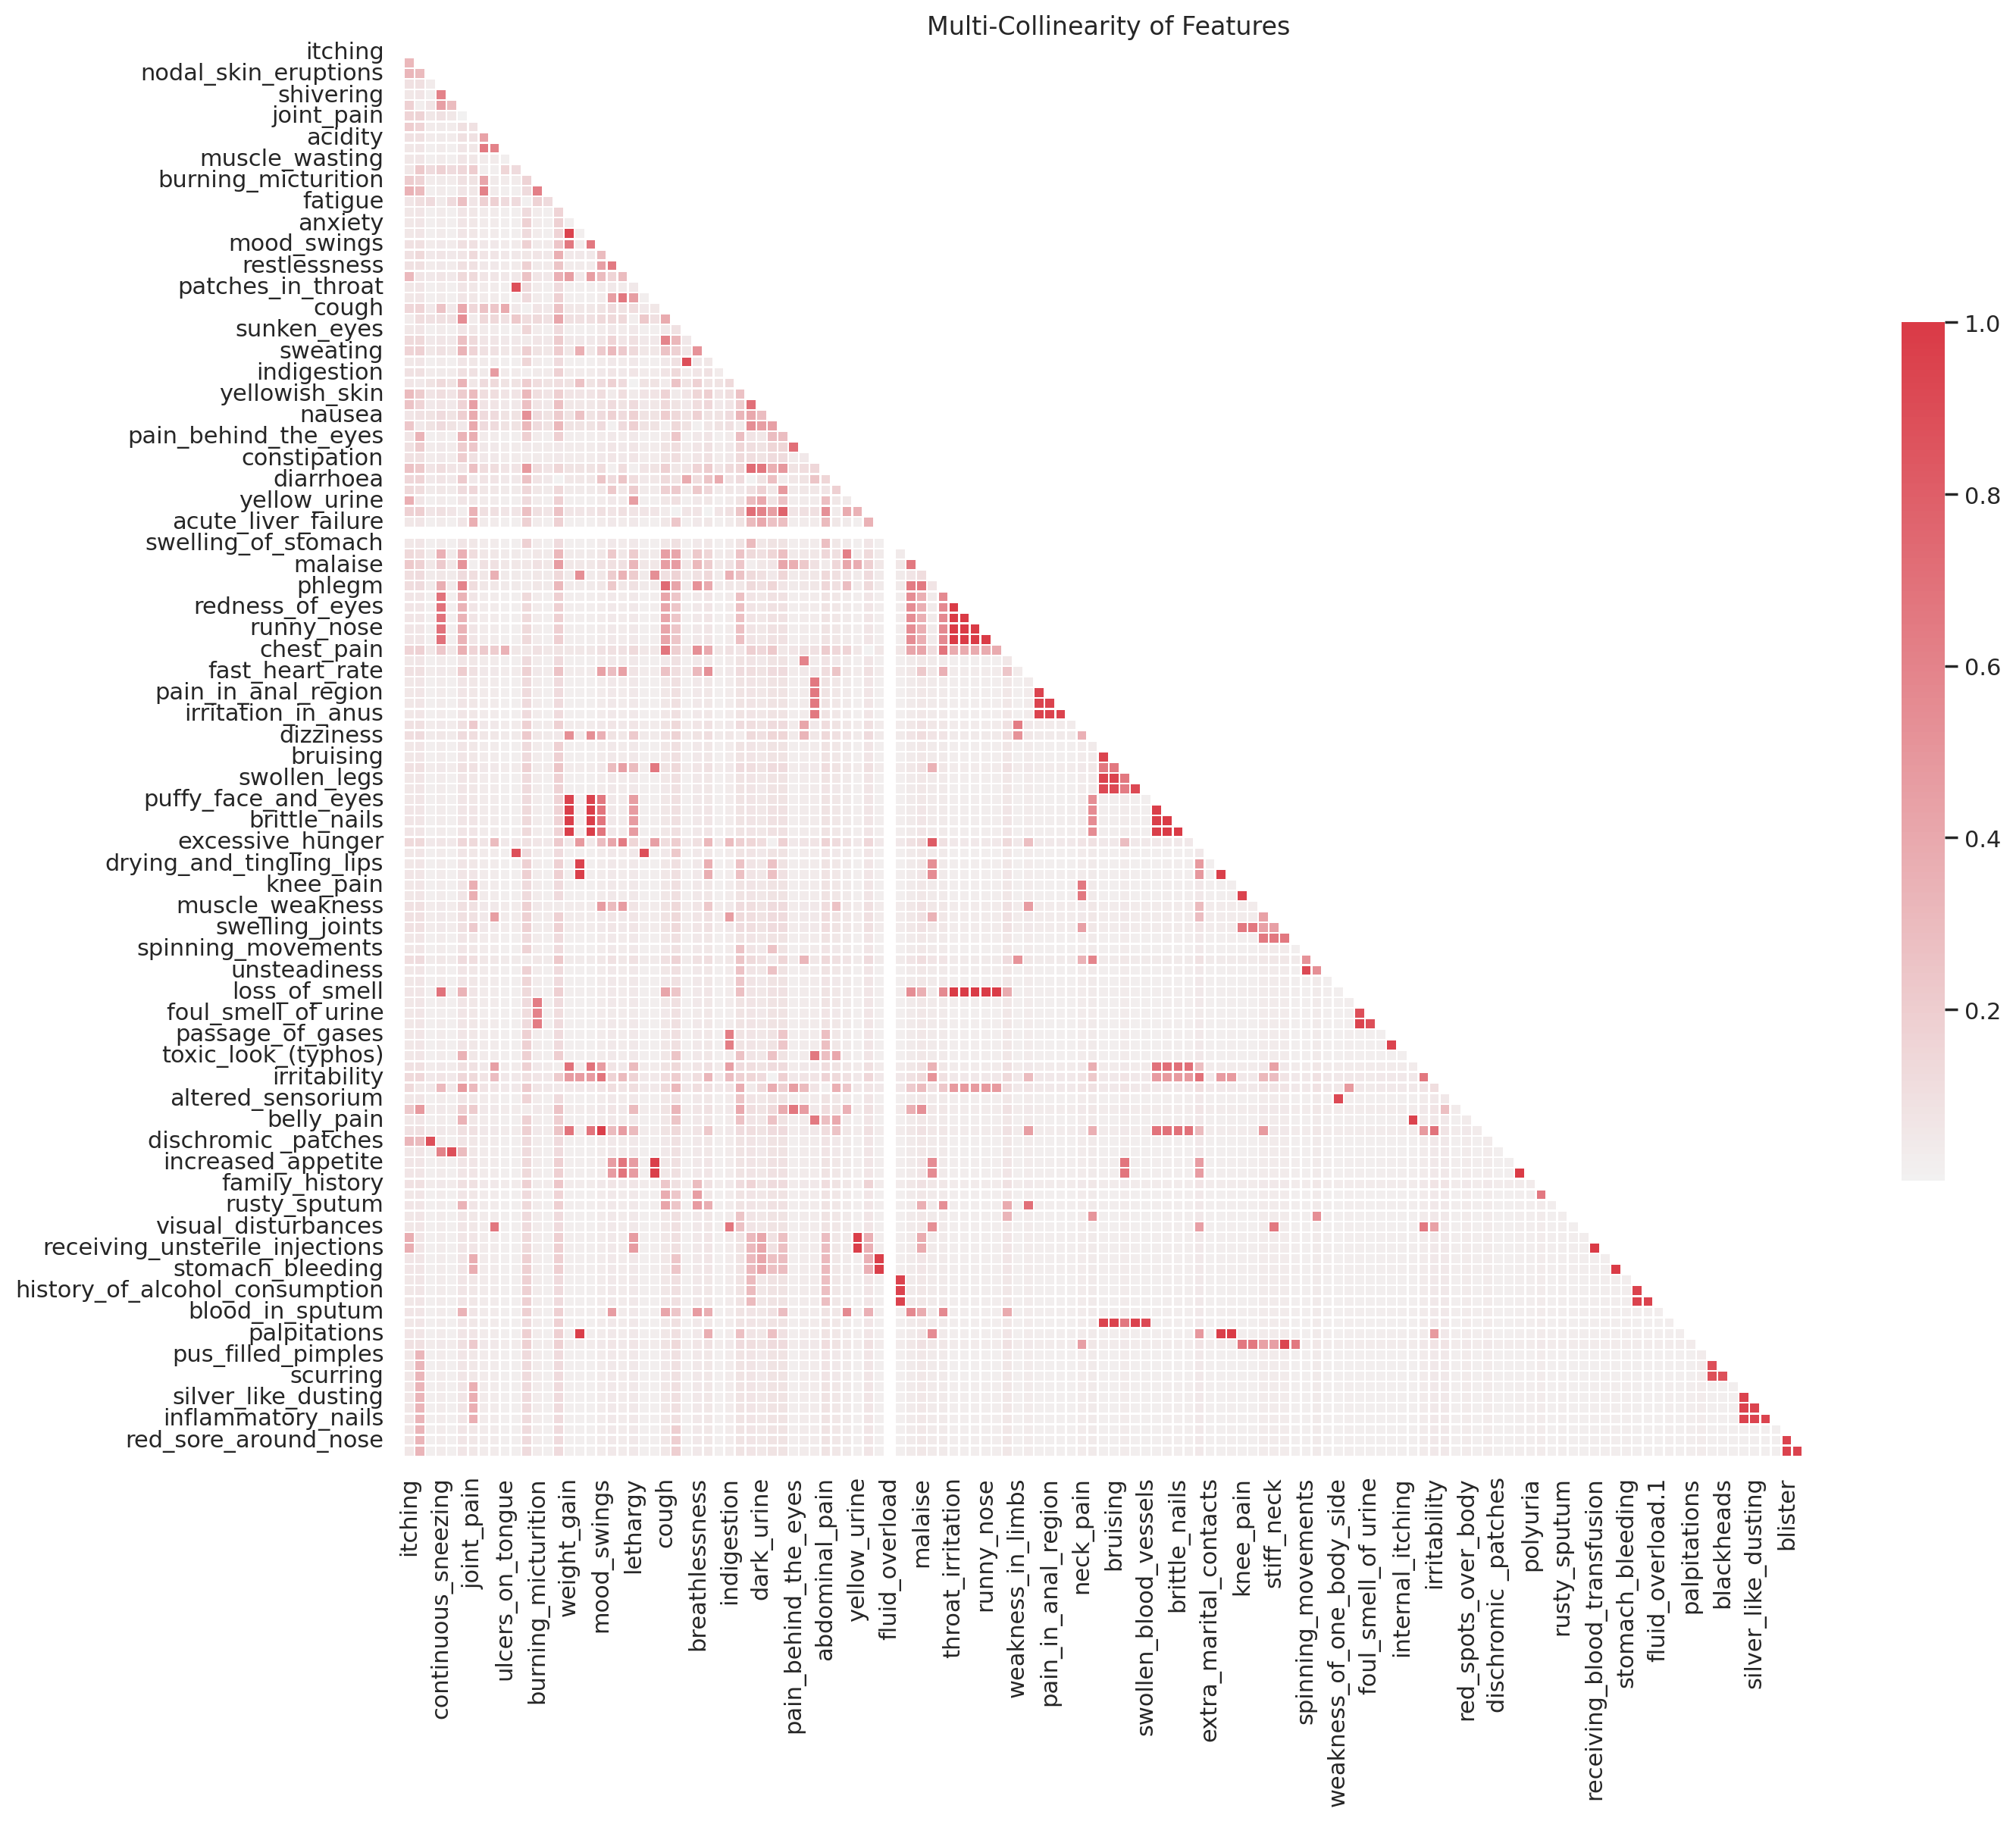

In [55]:
sns.set(style="white")

# Create a covariance matrix
corr = train.corr().abs()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15),dpi=200)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,
linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

In [56]:
# display the matrix in a raw state
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
print(upper_tri)

                      itching  skin_rash  nodal_skin_eruptions  \
itching                   NaN   0.318158              0.326439   
skin_rash                 NaN        NaN              0.298143   
nodal_skin_eruptions      NaN        NaN                   NaN   
continuous_sneezing       NaN        NaN                   NaN   
shivering                 NaN        NaN                   NaN   
...                       ...        ...                   ...   
small_dents_in_nails      NaN        NaN                   NaN   
inflammatory_nails        NaN        NaN                   NaN   
blister                   NaN        NaN                   NaN   
red_sore_around_nose      NaN        NaN                   NaN   
yellow_crust_ooze         NaN        NaN                   NaN   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                          0.086906   0.059893  0.175905    0.160650   
skin_rash                        0.094786   0.06532

In [57]:
# prepare the highly correlated features in a list so we can drop them :
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'slurred_speech', 'loss_of_smell', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'palpitations']


In [58]:
# dropping the highly correlated features
train_tri = train.drop(train[to_drop], axis=1)

In [59]:
len(train_tri)

4920

In [60]:
# i check one last time for unique diseases just incase i somehow lost one of them in the process
before = len(train['prognosis'].unique())
after = len(train_tri['prognosis'].unique())
print(f'unique diseases before : {before}')
print(f'unique diseases after : {after}')

unique diseases before : 41
unique diseases after : 41


In [61]:
# columns types to see if we need to convert anything
train_tri.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 116, dtype: object

In [62]:
features = list(train_tri.columns[:-1])  #features
target = 'prognosis'

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Skf = StratifiedKFold(n_splits=3)  #choose how many folds ( 3 in this example)

In [64]:
# let's compare the scores

Gnb_cross_score = cross_val_score(GaussianNB(), train_tri[features], train_tri[target])  # first argument : the model ,second argument : the X ,third argument : the Y
Rf_cross_score = cross_val_score(RandomForestClassifier(), train_tri[features], train_tri[target])
Dt_cross_score = cross_val_score(DecisionTreeClassifier(), train_tri[features], train_tri[target])

print(f'Naive bayes score\'s mean : {Gnb_cross_score.mean()}')
print(f'Random forest score\'s mean : {Rf_cross_score.mean()}')
print(f'Decision tree score\'s mean : {Dt_cross_score.mean()}')

Naive bayes score's mean : 1.0
Random forest score's mean : 1.0
Decision tree score's mean : 1.0


**Prediction**

In [65]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  y_train,  y_test = train_test_split(train_tri[features] ,train_tri[target] ,test_size = 0.3,random_state = 42)

In [66]:
# taking the prognosis column out so we can make predictions
pred = test[features]

In [67]:
# predictions using the random forest model
Rf = RandomForestClassifier()
model = Rf.fit(X_train, y_train)

predicted_values = model.predict(pred)

In [68]:
# time to compare results
predictions_df = pd.DataFrame(list(test['prognosis']),list(predicted_values), columns=['predicted'])
predictions_df = predictions_df.reset_index()
predictions_df = predictions_df.rename(columns={'index':'prognosis'})

predictions_df['result'] = ''
for x in range(len(predictions_df)) :
    if predictions_df['prognosis'][x] == predictions_df['predicted'][x] :
        predictions_df['result'].iloc[x]='Correct'
    else :
        predictions_df['result'].iloc[x]='Incorrect'

In [69]:
predictions_df

,prognosis,predicted,result
0,Fungal infection,Fungal infection,Correct
1,Allergy,Allergy,Correct
2,GERD,GERD,Correct
3,Chronic cholestasis,Chronic cholestasis,Correct
4,Drug Reaction,Drug Reaction,Correct
5,Peptic ulcer diseae,Peptic ulcer diseae,Correct
6,AIDS,AIDS,Correct
7,Diabetes,Diabetes,Correct
8,Gastroenteritis,Gastroenteritis,Correct
9,Bronchial Asthma,Bronchial Asthma,Correct
